In [1]:
from google.colab import drive
import os
import pandas as pd
from collections import defaultdict
import re
import matplotlib.pyplot as plt

import networkx as nx

import numpy as np

In [2]:
# Mount Google Drive
drive.mount('/content/drive')

# Wait until Google Drive is mounted
while not os.path.exists('/content/drive/My Drive/'):
    pass

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Drive folder to save the file
debian_path = '/content/drive/My Drive/IMT Atlantique/Semester 2/Project Complex/Coding/Mailing Lists/data/final/'
ubuntu_path = '/content/drive/My Drive/IMT Atlantique/Semester 2/Project Complex/Coding/ubuntu.com/data/'

# Create the folder if it doesn't exist
#os.makedirs(folder_path, exist_ok=True)

In [4]:
def extract_author_and_id(from_string):
    if isinstance(from_string, str):  # Verifica se o valor é uma string
        # Expressão regular para extrair o nome e o e-mail
        match = re.match(r'(.*) <(.*)@(.*)>', from_string)
        if match:
            name = match.group(1).strip()
            email = match.group(2).strip()
            return name, email
    return None, None

In [5]:
def add_author_id_column(df):
    # Aplicar a função extract_author_and_id na coluna 'From'
    df[['author', 'id']] = df['From'].apply(lambda x: pd.Series(extract_author_and_id(x)))
    # Combinar 'author' e 'id' em uma nova coluna 'author_id'
    df['author_id'] = df.apply(lambda row: f"{row['author']},{row['id']}" if pd.notnull(row['author']) and pd.notnull(row['id']) else None, axis=1)
    return df

## Data Source

In [6]:
# Define the path to the CSV file for repository
csv_files = {
    "email_content_deity_apt.csv": "apt",
    "email_content_pkg_systemd_maintainers.csv": "systemd",
    "email_content_debian_glibc.csv": "glibc",
    "email_content_debian_dpkg.csv": "dpkg"
}

# Lista para armazenar os DataFrames
dfs = []

for file_name, source in csv_files.items():
    file_path = debian_path + file_name
    df = pd.read_csv(file_path)
    df['source'] = source
    dfs.append(df)

all_ubuntu = ubuntu_path + "ubuntu-devel-discuss.csv"

# Read commit history from the CSV file
mailinglist_debian_df = pd.concat(dfs, ignore_index=True)
mailinglist_ubuntu_df = pd.read_csv(all_ubuntu)

In [7]:
mailinglist_debian_df.head()

,To,Subject,From,Content,Date,Message-id,Reply-to,Link,References,In-reply-to,Cc,Mail-followup-to,source,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0
0,Debian Bug Tracking System <submit@bugs.debian...,"Bug#1041732: ""N: Missing Signed-By in the sour...",Jörn Heissler <debbugs2023-07@wulf.eu.org>,Package: apt\nVersion: 2.7.2\nSeverity: minor\...,"Sat, 22 Jul 2023 18:58:45 +0200",<[🔎]169004512558.1067093.13380889301189885061....,"Jörn Heissler <debbugs2023-07@wulf.eu.org>,104...",https://lists.debian.org/deity/2023/deity-2023...,NaN,NaN,NaN,NaN,apt,NaN,NaN,NaN,NaN,NaN,NaN
1,David Kalnischkies <david@kalnischkies.de>,Bug#1041708: marked as done (apt: Manpages hav...,"""Debian Bug Tracking System"" <owner@bugs.debia...","Your message dated Sat, 22 Jul 2023 22:34:40 +...","Sat, 22 Jul 2023 20:39:05 +0000",<[🔎]handler.1041708.D1041708.16900580992998101...,1041708@bugs.debian.org,https://lists.debian.org/deity/2023/deity-2023...,<20230722203440.mdhuy2vepxalrush@crossbow> <[🔎...,NaN,NaN,NaN,apt,NaN,NaN,NaN,NaN,NaN,NaN
2,David Kalnischkies <david@kalnischkies.de>,"Bug#1041732: marked as done (""N: Missing Signe...","""Debian Bug Tracking System"" <owner@bugs.debia...","Your message dated Sat, 22 Jul 2023 22:36:41 +...","Sat, 22 Jul 2023 20:39:07 +0000",<[🔎]handler.1041732.D1041732.16900582062998628...,1041732@bugs.debian.org,https://lists.debian.org/deity/2023/deity-2023...,<20230722203641.qrr5rauoi3dutq5b@crossbow> <[🔎...,NaN,NaN,NaN,apt,NaN,NaN,NaN,NaN,NaN,NaN
3,Debian Bug Tracking System <submit@bugs.debian...,Bug#1041750: apt-get changelog nvidia-driver f...,Allan Wind <allan@yaxto.com>,Package: apt\nVersion: 2.6.1\nSeverity: normal...,"Sat, 22 Jul 2023 23:14:43 -0400",<[🔎]ZLybI5ytFDdQQZXw@lifeintegrity.com>,"Allan Wind <allan@yaxto.com>,1041750@bugs.debi...",https://lists.debian.org/deity/2023/deity-2023...,NaN,NaN,NaN,NaN,apt,NaN,NaN,NaN,NaN,NaN,NaN
4,"Allan Wind <allan@yaxto.com>,1041750@bugs.debi...",Bug#1041750: apt-get changelog nvidia-driver f...,David Kalnischkies <david@kalnischkies.de>,"On Sat, Jul 22, 2023 at 11:14:43PM -0400, Alla...","Sun, 23 Jul 2023 13:43:02 +0200",<[🔎]20230723114302.o44uszplvfx3saaf@crossbow>,"David Kalnischkies <david@kalnischkies.de>,104...",https://lists.debian.org/deity/2023/deity-2023...,<[🔎]ZLybI5ytFDdQQZXw@lifeintegrity.com> <[🔎]ZL...,<[🔎]ZLybI5ytFDdQQZXw@lifeintegrity.com>,NaN,NaN,apt,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
mailinglist_ubuntu_df.head()

,From,To,Date,Subject,Body
0,Matthew Kuiken <matt.kuiken@verizon.net>,ubuntu-devel-discuss@lists.ubuntu.com,"Sat, 09 Dec 2006 08:28:13 -0800",gmane request.,I have requested that this list be added to gm...
1,John Richard Moser <nigelenki@comcast.net>,NaN,"Sat, 09 Dec 2006 15:25:50 -0500",Re: NX bit broken on 32-bit,-----BEGIN PGP SIGNED MESSAGE-----\nHash: SHA1...
2,Colin Watson <cjwatson@ubuntu.com>,"ubuntu-devel@lists.ubuntu.com, ubuntu-devel-di...","Mon, 11 Dec 2006 13:13:31 +0000",Re: howto add a new vcs to /dev/,[Redirecting to ubuntu-devel-discuss; please r...
3,Jan Claeys <lists@janc.be>,Evan Hazlett <ejhazlett@gmail.com>,"Mon, 11 Dec 2006 17:41:21 +0100",Re: Concerns,"[Sent to the new ubuntu-devel-discuss list, to..."
4,"""Ernst Persson"" <ernstp@gmail.com>",ubuntu-devel-discuss@lists.ubuntu.com,"Tue, 12 Dec 2006 09:54:16 +0100",Re: New feature: mount local file systems in G...,"(Oh, there's a new mailing list!)\nHi Martin,\..."


In [9]:
# Renomear a coluna 'Body' para 'content' no DataFrame mailinglist_ubuntu_df
mailinglist_ubuntu_df.rename(columns={'Body': 'Content'}, inplace=True)

## Extract Author & ID

In [10]:
# Adicionar a coluna 'author_id' nos DataFrames
mailinglist_debian_df = add_author_id_column(mailinglist_debian_df)
mailinglist_ubuntu_df = add_author_id_column(mailinglist_ubuntu_df)

In [11]:
# Selecionar e reordenar as colunas necessárias
mailinglist_debian_df = mailinglist_debian_df[['Subject', 'Content', 'Date', 'From', 'To', 'author_id']]
mailinglist_ubuntu_df = mailinglist_ubuntu_df[['Subject', 'Content', 'Date', 'From', 'To', 'author_id']]

In [12]:
mailinglist_debian_df.head()

,Subject,Content,Date,From,To,author_id
0,"Bug#1041732: ""N: Missing Signed-By in the sour...",Package: apt\nVersion: 2.7.2\nSeverity: minor\...,"Sat, 22 Jul 2023 18:58:45 +0200",Jörn Heissler <debbugs2023-07@wulf.eu.org>,Debian Bug Tracking System <submit@bugs.debian...,"Jörn Heissler,debbugs2023-07"
1,Bug#1041708: marked as done (apt: Manpages hav...,"Your message dated Sat, 22 Jul 2023 22:34:40 +...","Sat, 22 Jul 2023 20:39:05 +0000","""Debian Bug Tracking System"" <owner@bugs.debia...",David Kalnischkies <david@kalnischkies.de>,"""Debian Bug Tracking System"",owner"
2,"Bug#1041732: marked as done (""N: Missing Signe...","Your message dated Sat, 22 Jul 2023 22:36:41 +...","Sat, 22 Jul 2023 20:39:07 +0000","""Debian Bug Tracking System"" <owner@bugs.debia...",David Kalnischkies <david@kalnischkies.de>,"""Debian Bug Tracking System"",owner"
3,Bug#1041750: apt-get changelog nvidia-driver f...,Package: apt\nVersion: 2.6.1\nSeverity: normal...,"Sat, 22 Jul 2023 23:14:43 -0400",Allan Wind <allan@yaxto.com>,Debian Bug Tracking System <submit@bugs.debian...,"Allan Wind,allan"
4,Bug#1041750: apt-get changelog nvidia-driver f...,"On Sat, Jul 22, 2023 at 11:14:43PM -0400, Alla...","Sun, 23 Jul 2023 13:43:02 +0200",David Kalnischkies <david@kalnischkies.de>,"Allan Wind <allan@yaxto.com>,1041750@bugs.debi...","David Kalnischkies,david"


In [13]:
mailinglist_ubuntu_df.head()

,Subject,Content,Date,From,To,author_id
0,gmane request.,I have requested that this list be added to gm...,"Sat, 09 Dec 2006 08:28:13 -0800",Matthew Kuiken <matt.kuiken@verizon.net>,ubuntu-devel-discuss@lists.ubuntu.com,"Matthew Kuiken,matt.kuiken"
1,Re: NX bit broken on 32-bit,-----BEGIN PGP SIGNED MESSAGE-----\nHash: SHA1...,"Sat, 09 Dec 2006 15:25:50 -0500",John Richard Moser <nigelenki@comcast.net>,NaN,"John Richard Moser,nigelenki"
2,Re: howto add a new vcs to /dev/,[Redirecting to ubuntu-devel-discuss; please r...,"Mon, 11 Dec 2006 13:13:31 +0000",Colin Watson <cjwatson@ubuntu.com>,"ubuntu-devel@lists.ubuntu.com, ubuntu-devel-di...","Colin Watson,cjwatson"
3,Re: Concerns,"[Sent to the new ubuntu-devel-discuss list, to...","Mon, 11 Dec 2006 17:41:21 +0100",Jan Claeys <lists@janc.be>,Evan Hazlett <ejhazlett@gmail.com>,"Jan Claeys,lists"
4,Re: New feature: mount local file systems in G...,"(Oh, there's a new mailing list!)\nHi Martin,\...","Tue, 12 Dec 2006 09:54:16 +0100","""Ernst Persson"" <ernstp@gmail.com>",ubuntu-devel-discuss@lists.ubuntu.com,"""Ernst Persson"",ernstp"


## Comparison by Contributor Name (Full Match)

In [14]:
# Extraindo os autores únicos de cada dataframe
authors_debian = set(mailinglist_debian_df['author_id'].unique())
authors_ubuntu = set(mailinglist_ubuntu_df['author_id'].unique())

# Encontrando os autores comuns
common_authors = authors_debian.intersection(authors_ubuntu)

# Criando o novo dataframe com os autores comuns
df_common_authors = pd.DataFrame({
    'contributor_debian': list(common_authors),
    'contributor_ubuntu': list(common_authors)
})

# Exibindo o novo dataframe
df_common_authors

,contributor_debian,contributor_ubuntu
0,"Laurent Bigonville,bigon","Laurent Bigonville,bigon"
1,"Rene Engelhard,rene","Rene Engelhard,rene"
2,"Chris Cheney,ccheney","Chris Cheney,ccheney"
3,"tangke,mumutouv","tangke,mumutouv"
4,"Yaroslav Halchenko,debian","Yaroslav Halchenko,debian"
...,...,...
160,"Scott Moser,smoser","Scott Moser,smoser"
161,"Rusty Russell,rusty","Rusty Russell,rusty"
162,"Timo Jyrinki,timo.jyrinki","Timo Jyrinki,timo.jyrinki"
163,"David Britton,david.britton","David Britton,david.britton"


## Comparison by Contributor Email (User ID)

In [15]:
# Extraindo os nomes únicos de cada dataframe
users_debian = set(mailinglist_debian_df['author_id'].unique())
users_ubuntu = set(mailinglist_ubuntu_df['author_id'].unique())

# Encontrando os nomes comuns
common_users = users_debian.intersection(users_ubuntu)

# Criando o novo dataframe com os nomes comuns
df_common_users = pd.DataFrame({
    'contributor_debian': list(common_users),
    'contributor_ubuntu': list(common_users)
})

# Exibindo o novo dataframe
df_common_users

,contributor_debian,contributor_ubuntu
0,"Laurent Bigonville,bigon","Laurent Bigonville,bigon"
1,"Rene Engelhard,rene","Rene Engelhard,rene"
2,"Chris Cheney,ccheney","Chris Cheney,ccheney"
3,"tangke,mumutouv","tangke,mumutouv"
4,"Yaroslav Halchenko,debian","Yaroslav Halchenko,debian"
...,...,...
160,"Scott Moser,smoser","Scott Moser,smoser"
161,"Rusty Russell,rusty","Rusty Russell,rusty"
162,"Timo Jyrinki,timo.jyrinki","Timo Jyrinki,timo.jyrinki"
163,"David Britton,david.britton","David Britton,david.britton"


In [16]:
'''# Assumindo que debian_df e ubuntu_df são os DataFrames originais com colunas 'author', 'id', e 'subject'
# Primeiro, combinamos ambos os DataFrames para identificar os contribuidores comuns
combined_df = pd.concat([mailinglist_debian_df, mailinglist_ubuntu_df])

# Extraímos os contribuidores comuns entre os dois projetos
common_contributors = set(mailinglist_debian_df['author_id']).intersection(set(mailinglist_ubuntu_df['author_id']))

# Criamos um grafo de contribuidores que participam nas mesmas threads
G = nx.Graph()

# Adicionar nós e arestas ao grafo com base no subject
for subject, group in combined_df.groupby('Subject'):
    contributors = group['author_id'].dropna().tolist()
    for i, contributor1 in enumerate(contributors):
        for contributor2 in contributors[i+1:]:
            if contributor1 != contributor2:
                if G.has_edge(contributor1, contributor2):
                    G[contributor1][contributor2]['weight'] += 1
                else:
                    G.add_edge(contributor1, contributor2, weight=1)

# Calcular a centralidade de grau para todos os nós
degree_centrality = nx.degree_centrality(G)

# Identificar contribuidores comuns
common_contributors = set(mailinglist_debian_df['author_id']).intersection(set(mailinglist_ubuntu_df['author_id']))

# Verificar se os contribuidores comuns estão no grafo
missing_contributors = [contributor for contributor in common_contributors if contributor not in G]
if missing_contributors:
    print(f"Missing contributors on graph: {missing_contributors}")

# Destacar os contribuidores comuns
node_colors = ['red' if node in common_contributors else '#1679AB' for node in G.nodes()]

# Plotar o grafo
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=50)
nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=10, edge_color='gray')
plt.title("Network of Contributors in Debian and Ubuntu Projects")
plt.axis('off')  # Remover os eixos para melhorar a visualização
plt.show()

# Mostrar os valores de centralidade para os contribuidores comuns
common_centrality = {node: degree_centrality[node] for node in common_contributors if node in degree_centrality}
print("Centralidade dos contribuidores comuns:")
print(common_centrality)'''

'# Assumindo que debian_df e ubuntu_df são os DataFrames originais com colunas \'author\', \'id\', e \'subject\'\n# Primeiro, combinamos ambos os DataFrames para identificar os contribuidores comuns\ncombined_df = pd.concat([mailinglist_debian_df, mailinglist_ubuntu_df])\n\n# Extraímos os contribuidores comuns entre os dois projetos\ncommon_contributors = set(mailinglist_debian_df[\'author_id\']).intersection(set(mailinglist_ubuntu_df[\'author_id\']))\n\n# Criamos um grafo de contribuidores que participam nas mesmas threads\nG = nx.Graph()\n\n# Adicionar nós e arestas ao grafo com base no subject\nfor subject, group in combined_df.groupby(\'Subject\'):\n    contributors = group[\'author_id\'].dropna().tolist()\n    for i, contributor1 in enumerate(contributors):\n        for contributor2 in contributors[i+1:]:\n            if contributor1 != contributor2:\n                if G.has_edge(contributor1, contributor2):\n                    G[contributor1][contributor2][\'weight\'] += 1\n   

In [17]:
# Função para criar um grafo a partir de um DataFrame
def create_graph(df):
    G = nx.Graph()
    for subject, group in df.groupby('Subject'):
        contributors = group['author_id'].dropna().tolist()
        for i, contributor1 in enumerate(contributors):
            for contributor2 in contributors[i+1:]:
                if contributor1 != contributor2:
                    if G.has_edge(contributor1, contributor2):
                        G[contributor1][contributor2]['weight'] += 1
                    else:
                        G.add_edge(contributor1, contributor2, weight=1)
    return G

In [18]:
# Identificar contribuidores comuns
common_contributors = set(mailinglist_debian_df['author_id']).intersection(set(mailinglist_ubuntu_df['author_id']))

In [19]:
# Criar grafos para Debian e Ubuntu
G_debian = create_graph(mailinglist_debian_df)
G_ubuntu = create_graph(mailinglist_ubuntu_df)

In [20]:
# Remover nós isolados (sem conexões)
G_debian.remove_nodes_from(list(nx.isolates(G_debian)))
G_ubuntu.remove_nodes_from(list(nx.isolates(G_ubuntu)))

In [21]:
# Função para remover componentes pequenos
def remove_small_components(G, min_size=4):
    components = list(nx.connected_components(G))
    for component in components:
        if len(component) < min_size:
            G.remove_nodes_from(component)
    return G

In [22]:
# Remover componentes pequenos (tamanho < 4)
G_debian = remove_small_components(G_debian, min_size=50)
G_ubuntu = remove_small_components(G_ubuntu, min_size=10)

In [23]:
# Calcular a centralidade de grau para todos os nós nos dois grafos
degree_centrality_debian = nx.degree_centrality(G_debian)
degree_centrality_ubuntu = nx.degree_centrality(G_ubuntu)

In [24]:
# Verificar se os contribuidores comuns estão nos grafos
missing_contributors_debian = [contributor for contributor in common_contributors if contributor not in G_debian]
missing_contributors_ubuntu = [contributor for contributor in common_contributors if contributor not in G_ubuntu]

if missing_contributors_debian:
    print(f"Contribuidores ausentes no grafo Debian: {missing_contributors_debian}")
if missing_contributors_ubuntu:
    print(f"Contribuidores ausentes no grafo Ubuntu: {missing_contributors_ubuntu}")

Contribuidores ausentes no grafo Debian: ['tangke,mumutouv', 'Wiebe Cazemier,wiebe', 'Mehdi Dogguy,mehdi', None, 'Peng Yu,pengyu.ut', 'Akbarkhon Variskhanov,akbarkhon.variskhanov', '"PEDRO MACANAS VALVERDE",macanas_ped', 'Nick Hill,nick', 'Khurshid Alam,khurshid.alam', 'Chuan-kai Lin,cklin', 'Daan De Meyer,daan.j.demeyer', 'Nomen Nescio,nobody', 'Reuben Thomas,rrt', 'Denis Washington,dwashington', 'DDPOMail robot,ddpomail', 'Jarno Suni,j_suni', 'Hajo Locke,Hajo.Locke', 'Fabio Massimo Di Nitto,fabbione', 'Alberto Salvia Novella,es20490446e', 'Josua Dietze,digidietze', 'Gonsolo,gonsolo', 'Marcel Partap,mpartap', 'Dale Amon,amon', 'Ken Gilmer,kgilmer', 'Milo Casagrande,milo', 'Stefano Rivera,stefanor', 'Martin Pool,mbp', 'Ivan Ivan,jappix14', 'Louis Bouchard,louis.bouchard', 'Wolfgang Rohdewald,wolfgang', 'Andrew Pollock,apollock', 'Iain Lane,iain', 'sam,sami.myllykoski', 'Jeremy Bicha,jeremy', 'Philip Prindeville,philipp_subx', 'Scott Moser,smoser']
Contribuidores ausentes no grafo Ubunt

In [25]:
# Destacar os contribuidores comuns
node_colors_debian = ['red' if node in common_contributors else '#1679AB' for node in G_debian.nodes()]
node_colors_ubuntu = ['red' if node in common_contributors else '#1679AB' for node in G_ubuntu.nodes()]

<ipython-input-26-68ff0d79214d>:5: UserWarning: 

The arrowstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(G_debian, pos, arrowstyle='-|>', arrowsize=10, edge_color='gray')


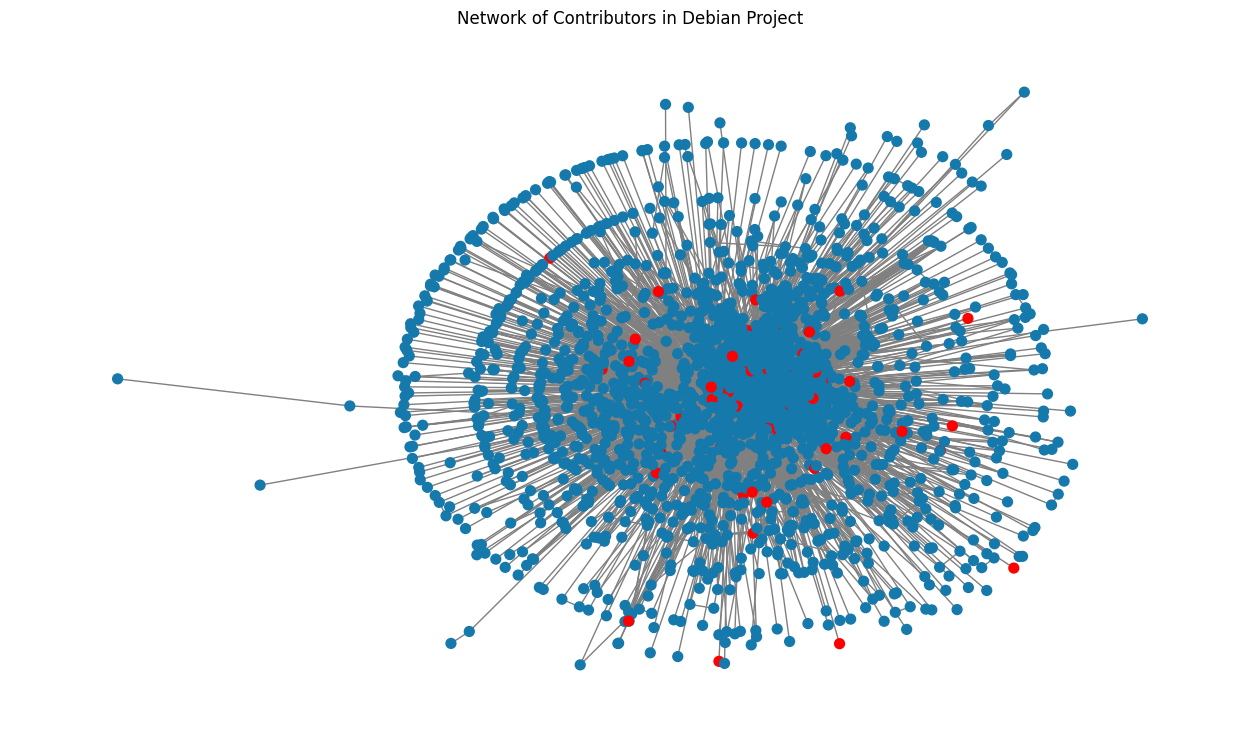

In [26]:
# Plotar o grafo Debian
plt.figure(figsize=(16, 9))
pos = nx.spring_layout(G_debian)
nx.draw_networkx_nodes(G_debian, pos, node_color=node_colors_debian, node_size=50)
nx.draw_networkx_edges(G_debian, pos, arrowstyle='-|>', arrowsize=10, edge_color='gray')
plt.title("Network of Contributors in Debian Project")
plt.axis('off')  # Remover os eixos para melhorar a visualização
plt.show()

In [ ]:
# prompt: make the previous plot using seaborn

import matplotlib.pyplot as plt
import seaborn as sns

# Plotar o grafo Debian
plt.figure(figsize=(16, 9))
pos = nx.spring_layout(G_debian)
sns.scatterplot(x=[pos[node][0] for node in G_debian.nodes()],
                y=[pos[node][1] for node in G_debian.nodes()],
                hue=[node_colors_debian[i] for i, node in enumerate(G_debian.nodes())],
                legend=False)
nx.draw_networkx_edges(G_debian, pos, arrowstyle='-|>', arrowsize=10, edge_color='gray')
plt.title("Network of Contributors in Debian Project")
plt.axis('off')  # Remover os eixos para melhorar a visualização
plt.show()


In [ ]:
# Plotar o grafo Ubuntu
plt.figure(figsize=(16, 9))
pos = nx.spring_layout(G_ubuntu)
nx.draw_networkx_nodes(G_ubuntu, pos, node_color=node_colors_ubuntu, node_size=50)
nx.draw_networkx_edges(G_ubuntu, pos, arrowstyle='-|>', arrowsize=10, edge_color='gray')
plt.title("Network of Contributors in Ubuntu Project")
plt.axis('off')
plt.show()

In [ ]:
# prompt: make the previous plot using seaborn

import matplotlib.pyplot as plt
import seaborn as sns

# Plotar o grafo Debian
plt.figure(figsize=(16, 9))
pos = nx.spring_layout(G_ubuntu)
sns.scatterplot(x=[pos[node][0] for node in G_ubuntu.nodes()],
                y=[pos[node][1] for node in G_ubuntu.nodes()],
                hue=[node_colors_debian[i] for i, node in enumerate(G_ubuntu.nodes())],
                legend=False)
nx.draw_networkx_edges(G_ubuntu, pos, arrowstyle='-|>', arrowsize=10, edge_color='gray')
plt.title("Network of Contributors in Ubuntu Project")
plt.axis('off')  # Remover os eixos para melhorar a visualização
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Assuming 'G' is the network graph
degree_centrality = nx.degree_centrality(G_debian)
values = list(degree_centrality.values())

plt.figure(figsize=(16, 6))
plt.hist(values, bins=30)
plt.title('Degree Centrality Distribution Debian Project')
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.show()

In [ ]:
def prune_graph(graph, threshold):
    pruned_graph = graph.copy()
    for node in list(pruned_graph.nodes()):
        if degree_centrality[node] < threshold:
            pruned_graph.remove_node(node)
    return pruned_graph

thresholds = [0.01, 0.02, 0.05, 0.1]
for threshold in thresholds:
    pruned_G = prune_graph(G_debian, threshold)
    print(f"Threshold: {threshold}")
    print(f"Number of Nodes: {pruned_G.number_of_nodes()}")
    print(f"Number of Edges: {pruned_G.number_of_edges()}")
    print(f"Average Clustering: {nx.average_clustering(pruned_G)}")
    print(f"Average Path Length: {nx.average_shortest_path_length(pruned_G)}")
    print("-----------")

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Assuming 'G' is the network graph
degree_centrality = nx.degree_centrality(G_ubuntu)
values = list(degree_centrality.values())

plt.figure(figsize=(16, 6))
plt.hist(values, bins=30)
plt.title('Degree Centrality Distribution Ubuntu Project')
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.show()

In [ ]:
def prune_graph(graph, threshold):
    pruned_graph = graph.copy()
    for node in list(pruned_graph.nodes()):
        if degree_centrality[node] < threshold:
            pruned_graph.remove_node(node)
    return pruned_graph

thresholds = [0.01, 0.02, 0.05, 0.1]
for threshold in thresholds:
    pruned_G = prune_graph(G_ubuntu, threshold)
    print(f"Threshold: {threshold}")
    print(f"Number of Nodes: {pruned_G.number_of_nodes()}")
    print(f"Number of Edges: {pruned_G.number_of_edges()}")
    print(f"Average Clustering: {nx.average_clustering(pruned_G)}")
    print(f"Average Path Length: {nx.average_shortest_path_length(pruned_G)}")
    print("-----------")

Threshold: 0.01
Number of Nodes: 528
Number of Edges: 12459
Average Clustering: 0.6271842675181323
Average Path Length: 1.9957521131619804
-----------
Threshold: 0.02
Number of Nodes: 283
Number of Edges: 7761
Average Clustering: 0.5815485916261487
Average Path Length: 1.812395058015688
-----------
Threshold: 0.05
Number of Nodes: 97
Number of Edges: 2364
Average Clustering: 0.6930958120463881
Average Path Length: 1.4922680412371134
-----------
Threshold: 0.1
Number of Nodes: 26
Number of Edges: 292
Average Clustering: 0.940347907876512
Average Path Length: 1.1015384615384616
-----------


In [ ]:
# prompt: prune the networks

# Prune the networks by removing nodes with low degree centrality
def prune_network(G, threshold):
    nodes_to_remove = [node for node, degree in nx.degree_centrality(G).items() if degree < threshold]
    G.remove_nodes_from(nodes_to_remove)
    return G

# Prune Debian and Ubuntu networks
threshold_debian = 0.05
threshold_ubuntu = 0.05
G_debian_pruned = prune_network(G_debian, threshold_debian)
G_ubuntu_pruned = prune_network(G_ubuntu, threshold_ubuntu)

# Remove isolated nodes
G_debian_pruned.remove_nodes_from(list(nx.isolates(G_debian_pruned)))
G_ubuntu_pruned.remove_nodes_from(list(nx.isolates(G_ubuntu_pruned)))

<ipython-input-35-c7964bf5be27>:9: UserWarning: 

The arrowstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(G_debian_pruned, pos, arrowstyle='-|>', arrowsize=10, edge_color='gray')


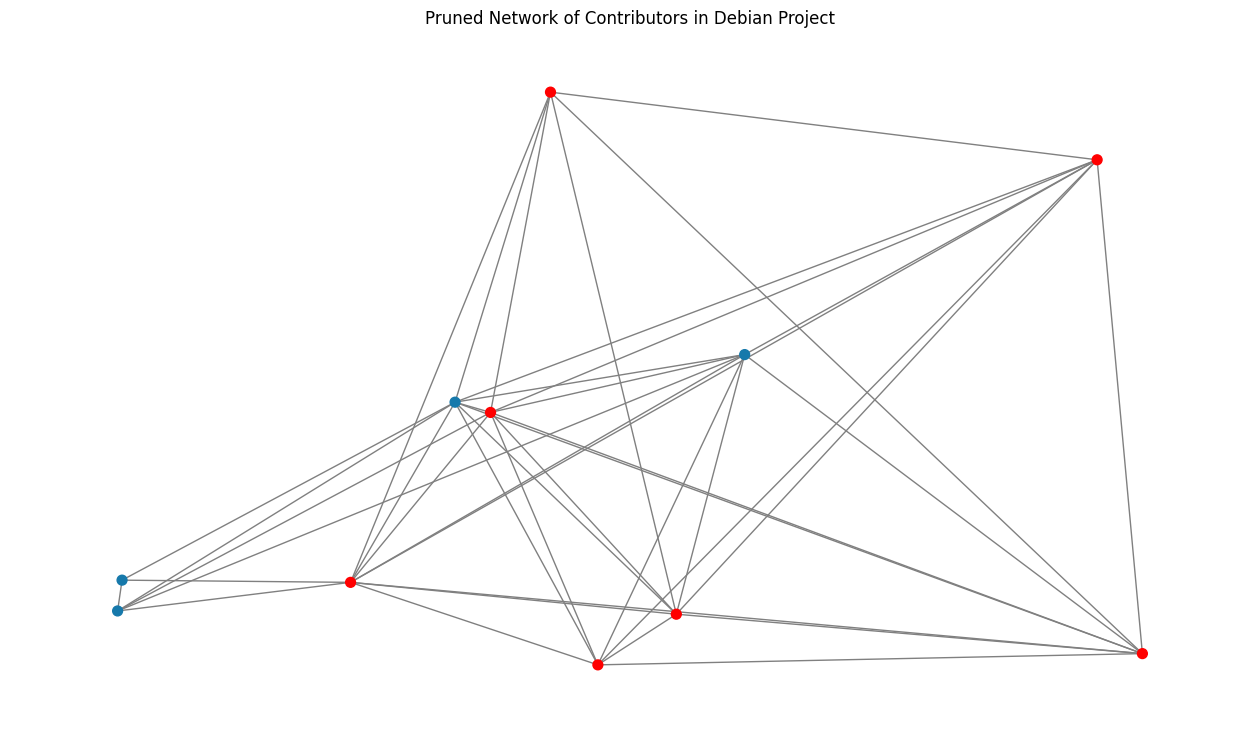

In [ ]:
# Plot the pruned Debian network
plt.figure(figsize=(16, 9))
pos = nx.spring_layout(G_debian_pruned)

# Update node colors for the pruned graph
node_colors_debian_pruned = ['red' if node in common_contributors else '#1679AB' for node in G_debian_pruned.nodes()]

nx.draw_networkx_nodes(G_debian_pruned, pos, node_color=node_colors_debian_pruned, node_size=50) # Use updated node colors
nx.draw_networkx_edges(G_debian_pruned, pos, arrowstyle='-|>', arrowsize=10, edge_color='gray')
plt.title("Pruned Network of Contributors in Debian Project")
plt.axis('off')  # Remover os eixos para melhorar a visualização
plt.show()

<ipython-input-36-9d684423b2d6>:9: UserWarning: 

The arrowstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(G_ubuntu_pruned, pos, arrowstyle='-|>', arrowsize=10, edge_color='gray')


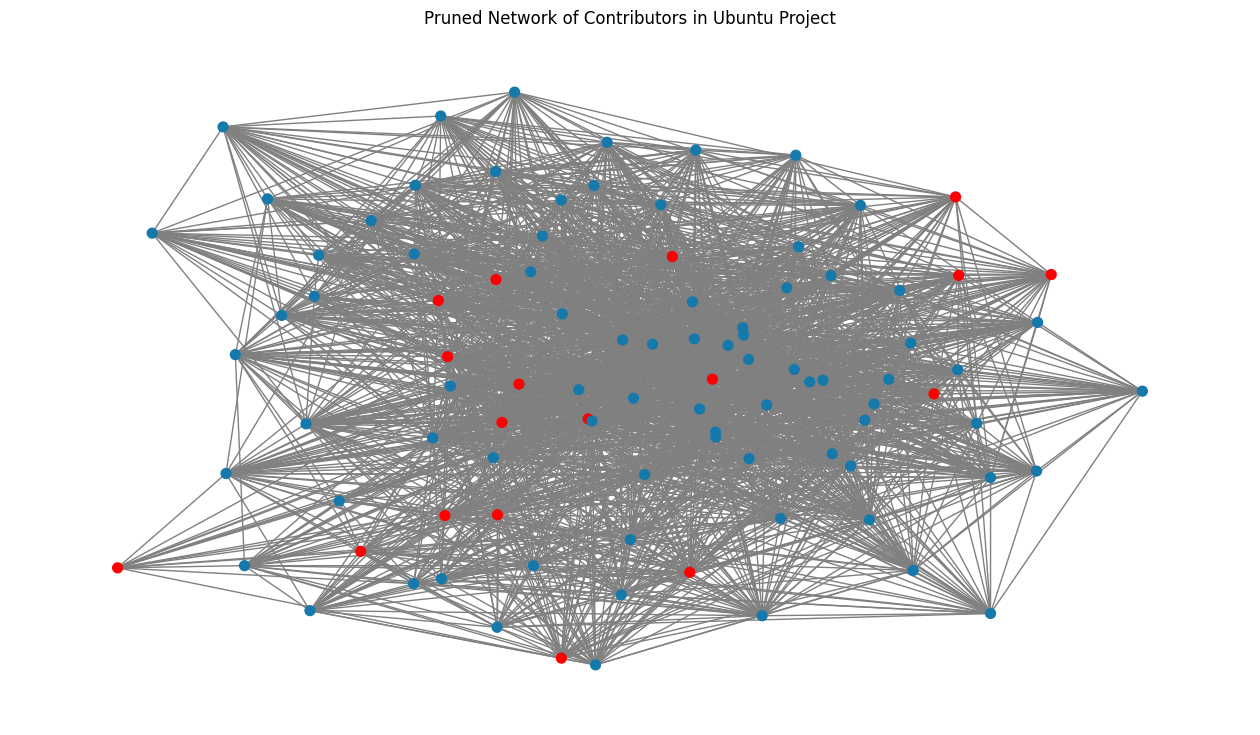

In [ ]:
# Plot the pruned Debian network
plt.figure(figsize=(16, 9))
pos = nx.spring_layout(G_ubuntu_pruned)

# Update node colors for the pruned graph
node_colors_ubuntu_pruned = ['red' if node in common_contributors else '#1679AB' for node in G_ubuntu_pruned.nodes()]

nx.draw_networkx_nodes(G_ubuntu_pruned, pos, node_color=node_colors_ubuntu_pruned, node_size=50) # Use updated node colors
nx.draw_networkx_edges(G_ubuntu_pruned, pos, arrowstyle='-|>', arrowsize=10, edge_color='gray')
plt.title("Pruned Network of Contributors in Ubuntu Project")
plt.axis('off')  # Remover os eixos para melhorar a visualização
plt.show()

## Degree Distribution

In [ ]:
# Função para plotar a distribuição de grau
def plot_degree_distribution(G, title):
    degrees = [G.degree(n) for n in G.nodes()]
    degree_count = np.bincount(degrees)
    degree_prob = degree_count / sum(degree_count)

    plt.figure(figsize=(12, 6))
    plt.plot(range(len(degree_prob)), degree_prob, 'bo-')
    plt.xlabel('Degree (k)')
    plt.ylabel('P(k)')
    plt.title(f'Degree Distribution - {title}')
    plt.yscale('log')
    plt.xscale('log')
    plt.grid(False)
    plt.show()

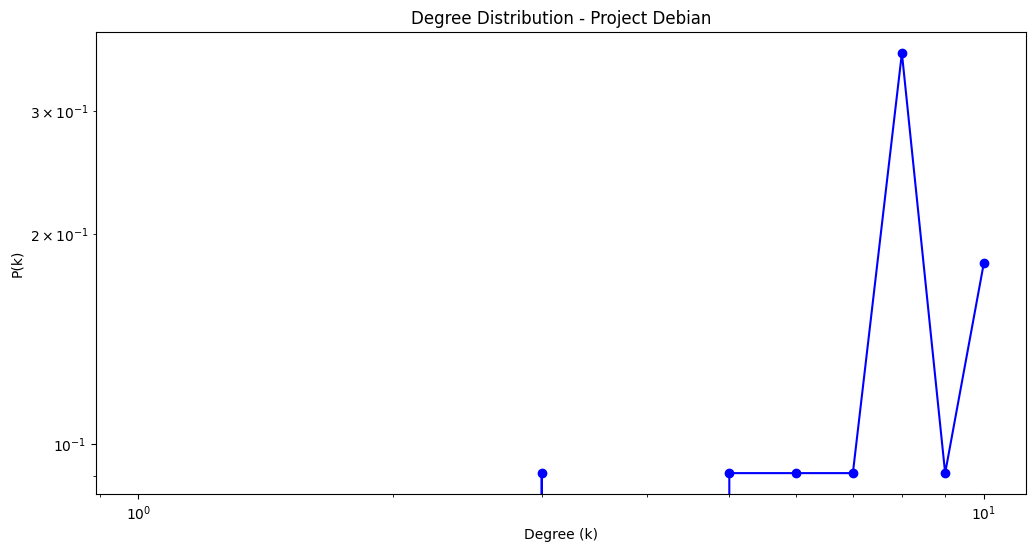

In [ ]:
# Plotar a distribuição de grau para Debian e Ubuntu
plot_degree_distribution(G_debian, 'Project Debian')

In [ ]:
plot_degree_distribution(G_ubuntu, 'Project Ubuntu')

## Centrality

In [ ]:
# Mostrar os valores de centralidade para os contribuidores comuns
common_centrality_debian = {node: degree_centrality_debian[node] for node in common_contributors if node in degree_centrality_debian}
common_centrality_ubuntu = {node: degree_centrality_ubuntu[node] for node in common_contributors if node in degree_centrality_ubuntu}

print("Centrality of common contributors - Project Debian:")
common_centrality_debian

print("Centrality of common contributors - Project Ubuntu:")
common_centrality_ubuntu

## Density

In [ ]:
# Calcular a densidade dos grafos
density_debian = nx.density(G_debian)
density_ubuntu = nx.density(G_ubuntu)

print(f"Density of Graph - Project Debian: {density_debian}")
print(f"Density of Graph - Project Ubuntu: {density_ubuntu}")